In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv("data/vgsales.csv")

In [3]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None
(16598, 11)


In [5]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
data = data.drop(data[data['Year'] > 2015].index)

In [7]:
print(data.isnull().sum())
print(data.shape)

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
(16250, 11)


In [8]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16250.000000,15979.000000,16250.000000,16250.000000,16250.000000,16250.000000,16250.000000
mean,8233.153785,2006.197071,0.268924,0.148146,0.078601,0.048614,0.544564
std,4775.382512,5.714810,0.824467,0.509035,0.312196,0.190271,1.569213
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4095.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8213.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12340.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2015.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [9]:
data['Genre'].value_counts()

Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

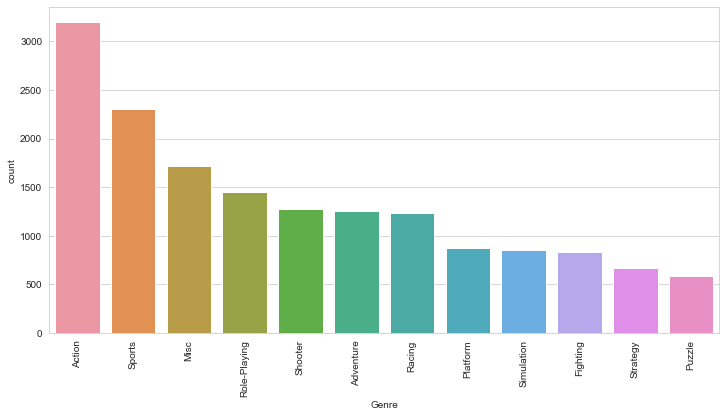

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='Genre', data=data, order=data['Genre'].value_counts().index)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 <a list of 36 Text xticklabel objects>)

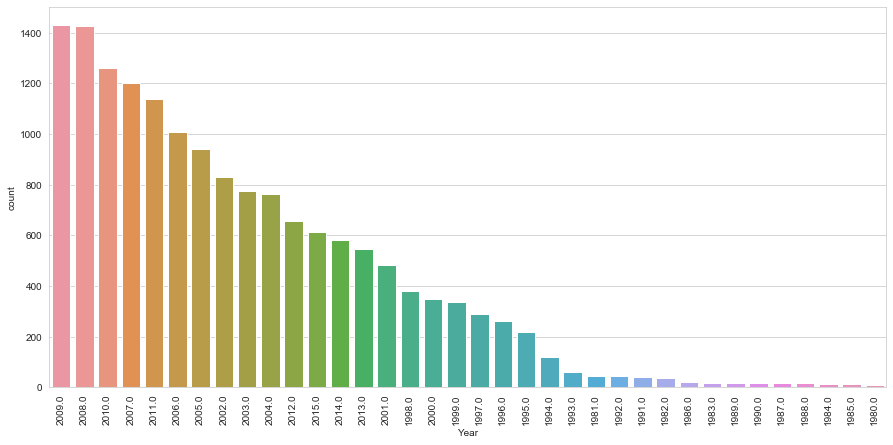

In [11]:
plt.figure(figsize=(15,7))
sns.countplot(x='Year', data=data, order=data.groupby('Year')['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

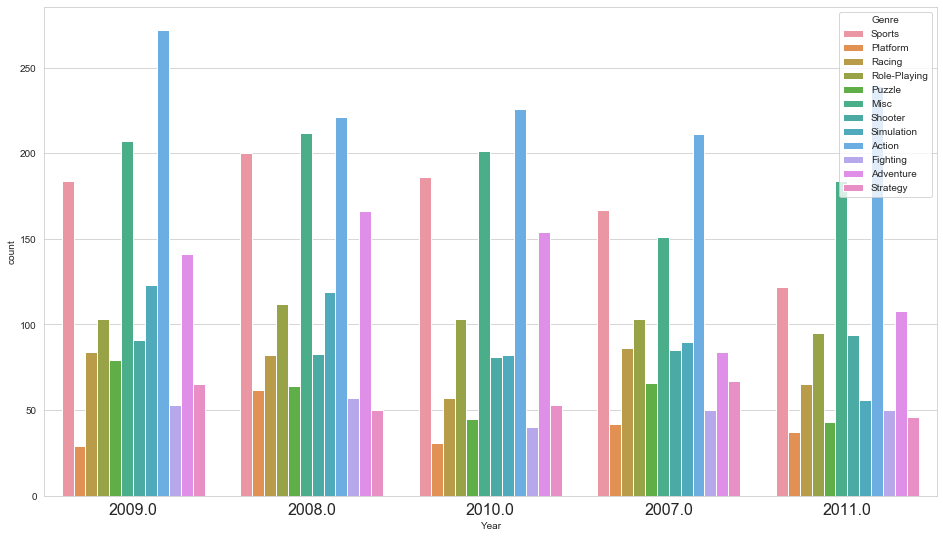

In [12]:
plt.figure(figsize=(16,9))
sns.countplot(x='Year', data=data, hue='Genre', order=data['Year'].value_counts().iloc[:5].index)
plt.xticks(size=16)

In [13]:
data_year = data.groupby('Year')['Global_Sales'].sum()
data_year = data_year.reset_index()
data_year

,Year,Global_Sales
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36
5,1985.0,53.94
6,1986.0,37.07
7,1987.0,21.74
8,1988.0,47.22
9,1989.0,73.45


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 <a list of 36 Text xticklabel objects>)

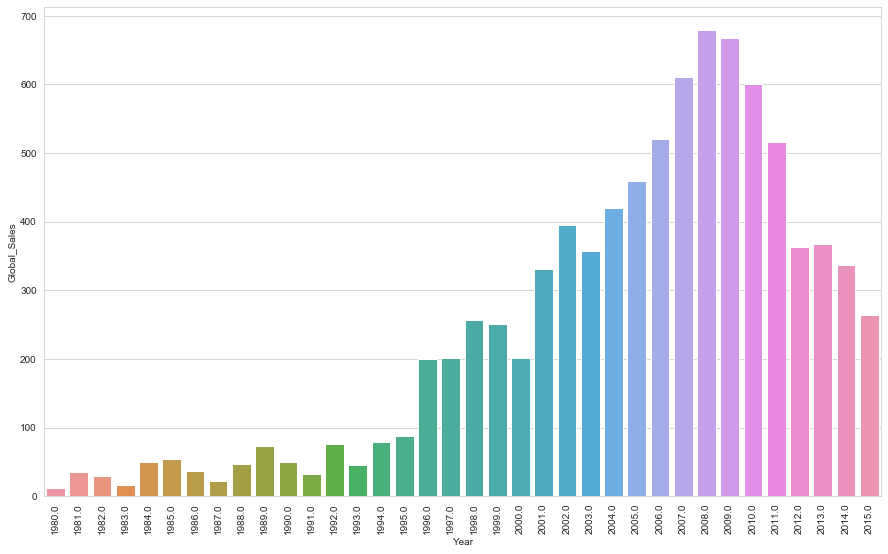

In [14]:
plt.figure(figsize=(15,9))
sns.barplot(x='Year', y='Global_Sales', data=data_year)
plt.xticks(rotation=90)

In [15]:
year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='count')

In [16]:
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']

In [17]:
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)

In [18]:
year_max_genre = year_max_genre.drop_duplicates(subset=['Year', 'count'], keep='last').reset_index(drop=True)

In [19]:
genre = year_max_genre['Genre'].values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 <a list of 36 Text xticklabel objects>)

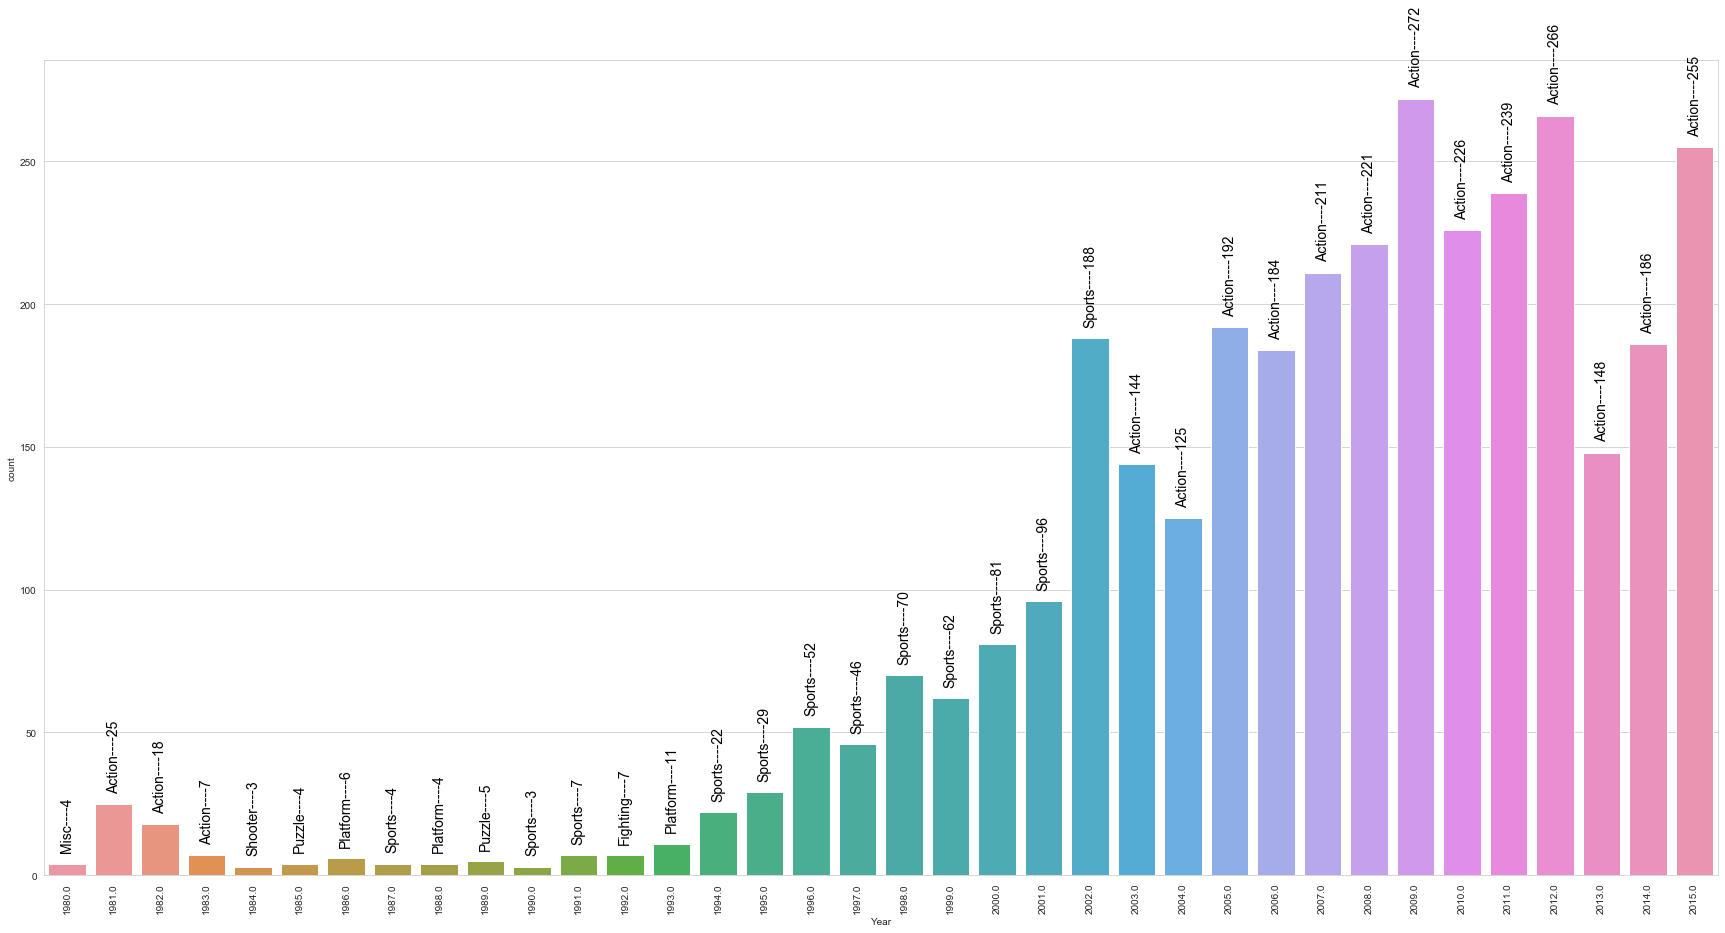

In [20]:
plt.figure(figsize=(30,15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index=0
for value in year_max_genre['count'].values:
    
    g.text(index, value + 5, str(genre[index] + '----' + str(value)), color='#000000', size=14, rotation=90, ha='center')
    index += 1
    
    
plt.xticks(rotation=90)

In [21]:
year_sale_dx = data.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

In [22]:
genre = year_sale_max['Genre']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 <a list of 36 Text xticklabel objects>)

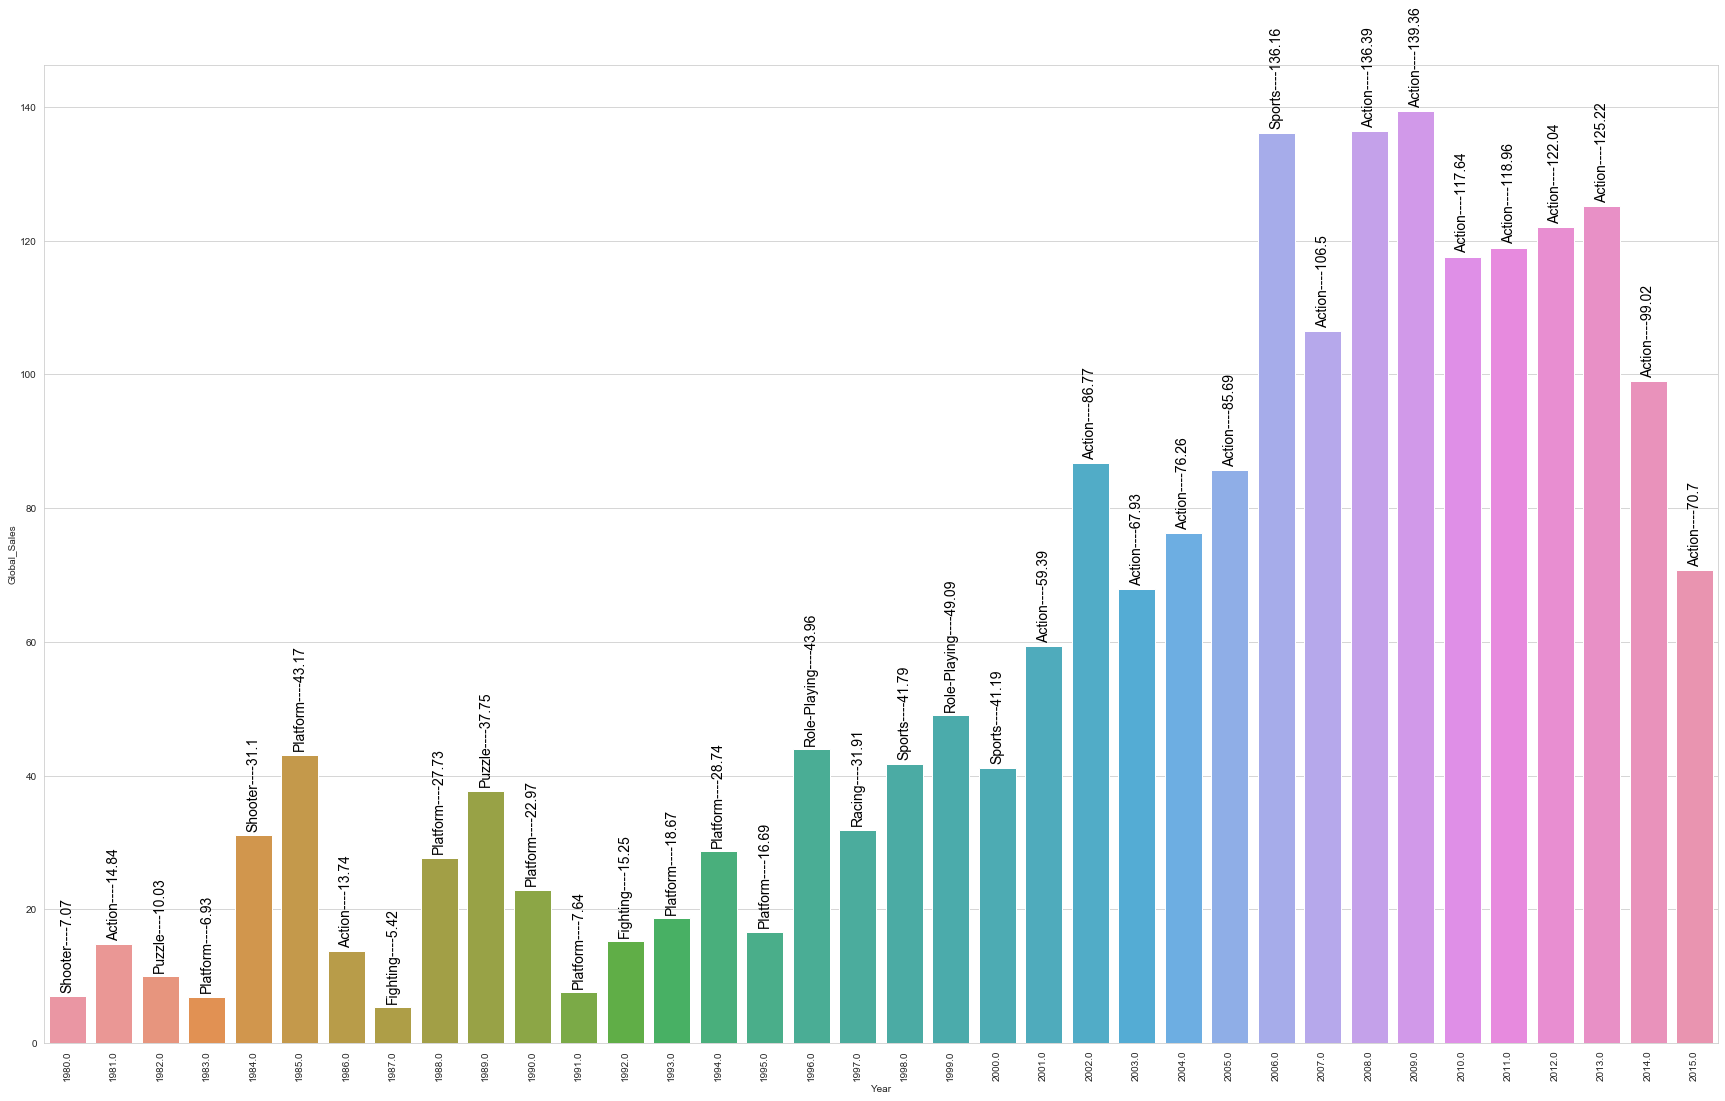

In [23]:
plt.figure(figsize=(30,18))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)
index=0
for value in year_sale_max['Global_Sales']:
    
    g.text(index, value + 1, str(genre[index] + '----' + str(round(value, 2))), color='#000000', size=14, rotation=90, ha='center')
    index += 1
    
    
plt.xticks(rotation=90)

In [24]:
data_genre = data.groupby('Genre')['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values('Global_Sales', ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

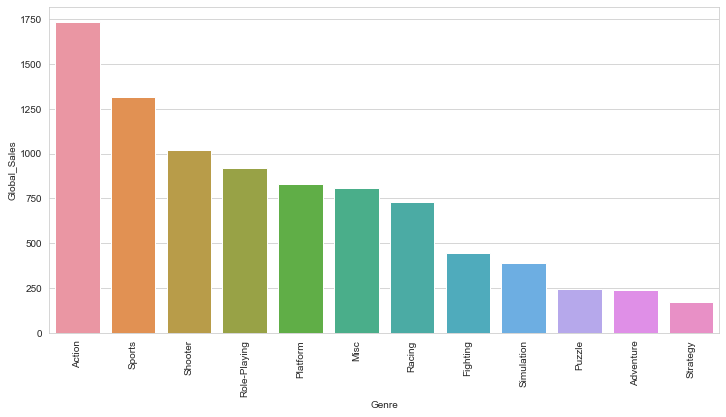

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x='Genre', y='Global_Sales', data=data_genre)
plt.xticks(rotation=90)

In [26]:
data_platform = data.groupby('Platform')['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values('Global_Sales', ascending=False)

In [27]:
data_platform['Platform']

16     PS2
28    X360
17     PS3
26     Wii
4       DS
15      PS
6      GBA
19     PSP
29      XB
13      PC
5       GB
11     NES
2      3DS
18     PS4
10     N64
23    SNES
7       GC
30    XOne
0     2600
27    WiiU
20     PSV
21     SAT
8      GEN
3       DC
22     SCD
12      NG
25      WS
24    TG16
1      3DO
9       GG
14    PCFX
Name: Platform, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

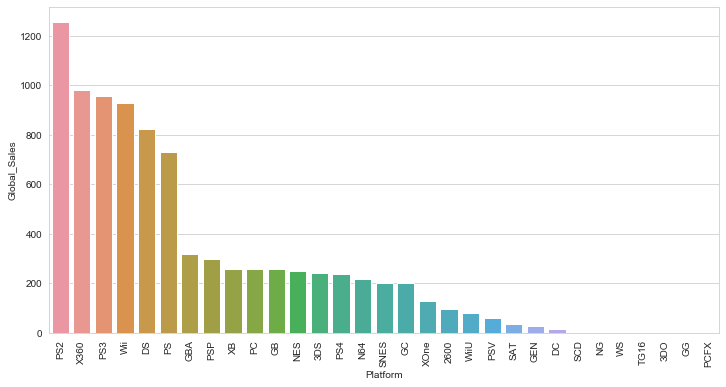

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.xticks(rotation=90)

In [29]:
top_game_sale = data.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values('Global_Sales', ascending=False)

In [30]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0,20)

Text(0.5, 0, 'Release Year')

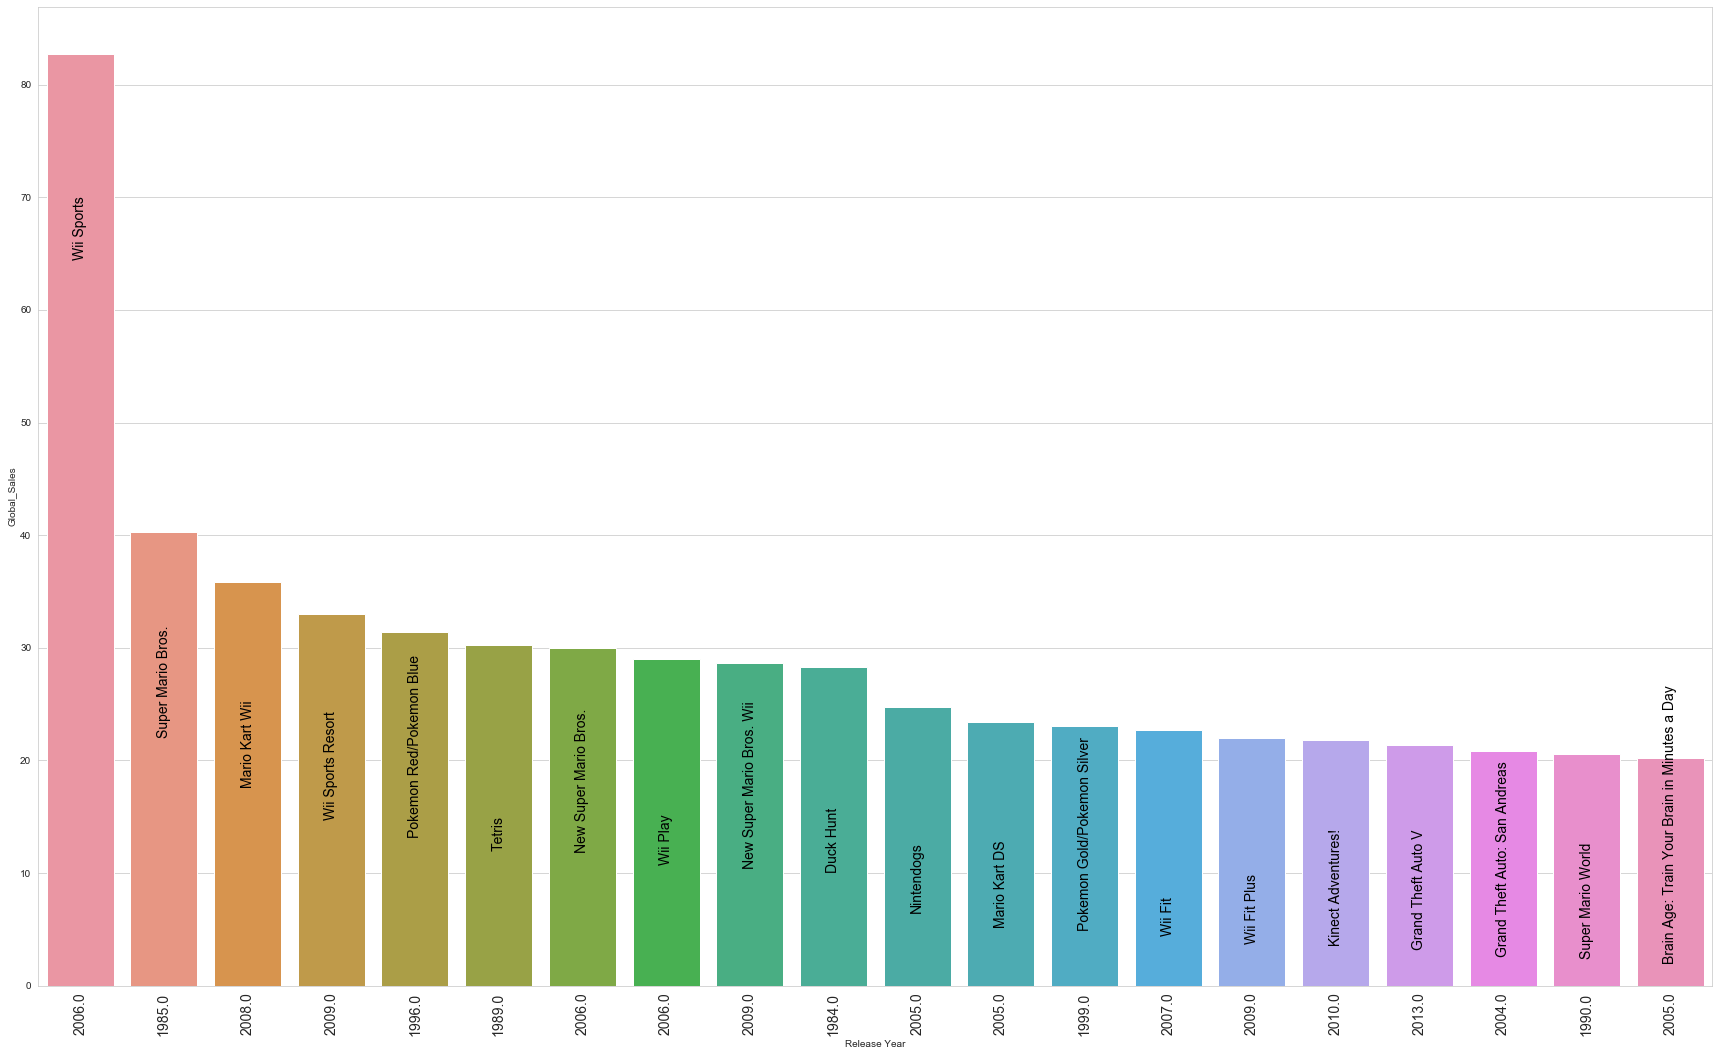

In [31]:
plt.figure(figsize=(30,18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)

index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000000', size=14, rotation=90, ha='center')
    index += 1
    
plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=90)
plt.xlabel('Release Year')

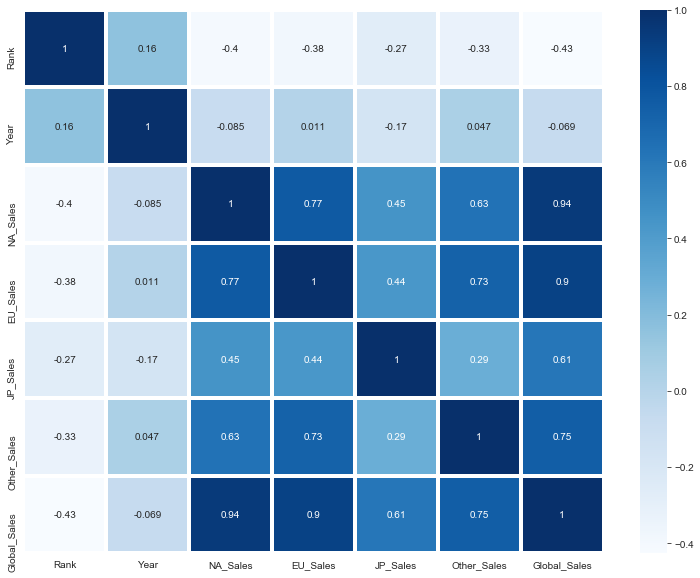

In [32]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap='Blues', annot=True, linewidth=3)

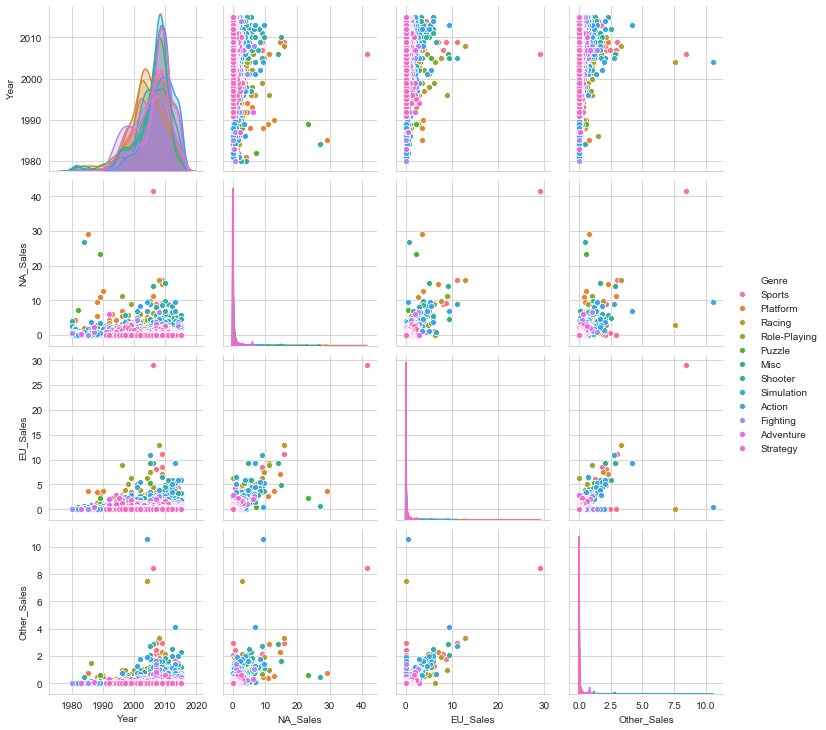

In [33]:
data_pair = data.loc[:, ['Year', 'Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'Other_Sales']]
sns.pairplot(data_pair, hue='Genre')

In [34]:
data_pair_log = data_pair.copy()

In [35]:
data_pair_log

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006.0,Wii,Sports,41.49,29.02,8.46
1,1985.0,NES,Platform,29.08,3.58,0.77
2,2008.0,Wii,Racing,15.85,12.88,3.31
3,2009.0,Wii,Sports,15.75,11.01,2.96
4,1996.0,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
16593,2002.0,GBA,Platform,0.01,0.00,0.00
16594,2003.0,GC,Shooter,0.01,0.00,0.00
16595,2008.0,PS2,Racing,0.00,0.00,0.00
16596,2010.0,DS,Puzzle,0.00,0.01,0.00


In [36]:
sale_columns = ['NA_Sales', 'EU_Sales', 'Other_Sales']

In [37]:
data_pair_log = data_pair_log[data_pair_log['NA_Sales'] != 0]
data_pair_log = data_pair_log[data_pair_log['EU_Sales'] != 0]
data_pair_log = data_pair_log[data_pair_log['Other_Sales'] != 0]

In [38]:
data_pair_log['NA_Sales'] = np.log(data_pair_log['NA_Sales'])
data_pair_log['EU_Sales'] = np.log(data_pair_log['EU_Sales'])
data_pair_log['Other_Sales'] = np.log(data_pair_log['Other_Sales'])

In [39]:
data_pair_log

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006.0,Wii,Sports,3.725452,3.367985,2.135349
1,1985.0,NES,Platform,3.370051,1.275363,-0.261365
2,2008.0,Wii,Racing,2.763170,2.555676,1.196948
3,2009.0,Wii,Sports,2.756840,2.398804,1.085189
4,1996.0,GB,Role-Playing,2.422144,2.184927,0.000000
...,...,...,...,...,...,...
14071,1998.0,PC,Role-Playing,-4.605170,-3.912023,-4.605170
14183,2014.0,PS3,Racing,-3.912023,-4.605170,-4.605170
14185,2011.0,PC,Puzzle,-4.605170,-3.912023,-4.605170
14267,2007.0,PC,Puzzle,-4.605170,-3.912023,-4.605170


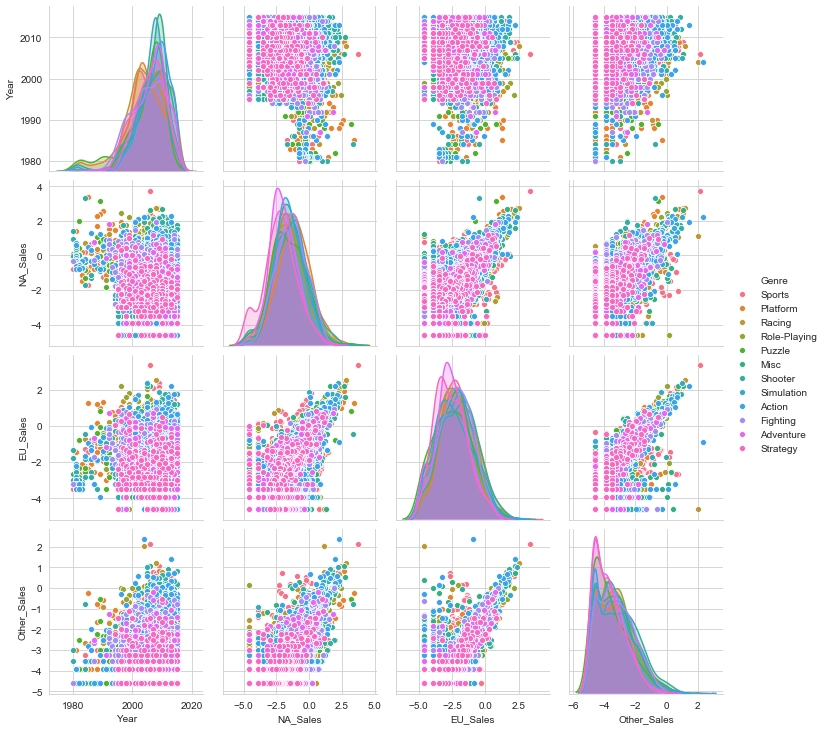

In [40]:
sns.pairplot(data_pair_log, hue='Genre',  palette="husl")